Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 05: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before end of **Monday, December 16, 2024**. If you need help (and Google and other resources were not enough), feel free to use the Stud.IP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Periodic functions) [0 Points]

This exercise does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What are periodic functions? Can you provide a definition?

YOUR ANSWER HERE

**b)** What are *amplitude*, *frequency*, *wave length*, and *phase* of a sine function? How can you change these properties?

YOUR ANSWER HERE

**c)** How are sine and cosine defined for complex arguments? In what sense does this generalize the real case?

YOUR ANSWER HERE

## Assignment 1: Understanding Fourier Transform (7 points)

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

/var/folders/kn/bv0rdtyn2lg_yn_lp1ln__tc0000gn/T/ipykernel_3178/3098891508.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('images/dolly.png')


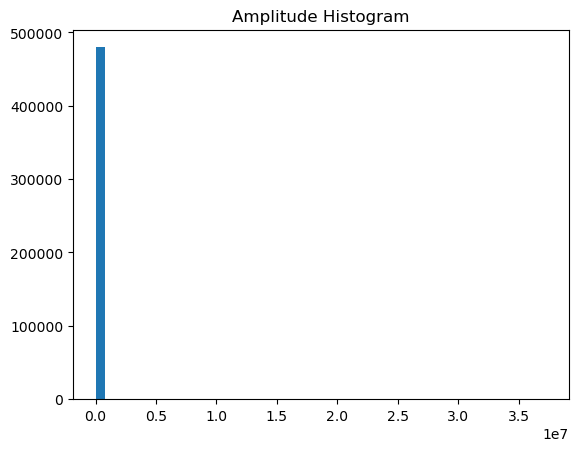

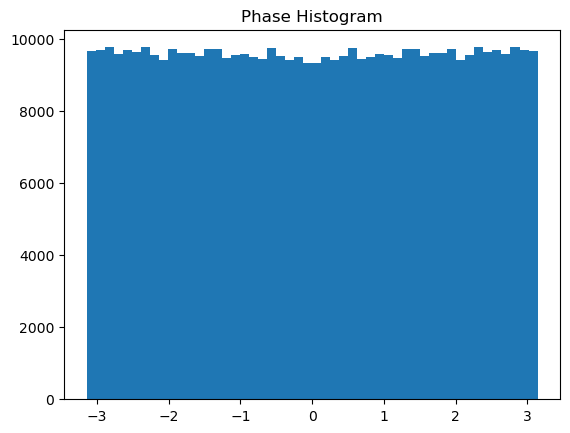

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')


# OUR CODE HERE
from imageio import imread

# Load the already grayscale image
img = imread('images/dolly.png')

# Compute the 2D Fourier transform of the image
F = np.fft.fft2(img)

# Extract the amplitude (magnitude) and phase components
amplitude = np.abs(F)
phase = np.angle(F)

# Plot the amplitude histogram
plt.figure()
plt.hist(amplitude.ravel(), bins=50)
plt.title('Amplitude Histogram')
plt.show()

# Plot the phase histogram
plt.figure()
plt.hist(phase.ravel(), bins=50)
plt.title('Phase Histogram')
plt.show()



**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-06, slide 16-20.

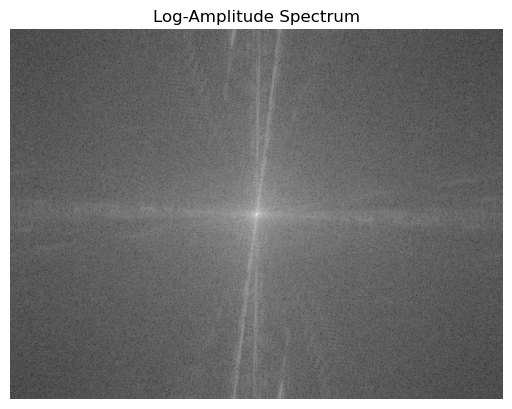

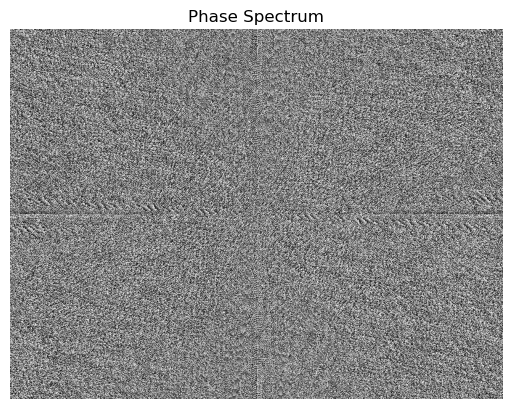

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# OUR CODE HERE

F_shift = np.fft.fftshift(F)
amp_shift = np.abs(F_shift)
phase_shift = np.angle(F_shift)

plt.figure()
plt.imshow(np.log1p(amp_shift), cmap='gray')
plt.title('Log-Amplitude Spectrum')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(phase_shift, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')
plt.show()



We see energy concentrated at low frequencies in the center. The amplitude spectrum highlights dominant image structures; the phase spectrum looks noisy and irregular.

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

/var/folders/kn/bv0rdtyn2lg_yn_lp1ln__tc0000gn/T/ipykernel_3178/880115342.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('images/dolly.png')


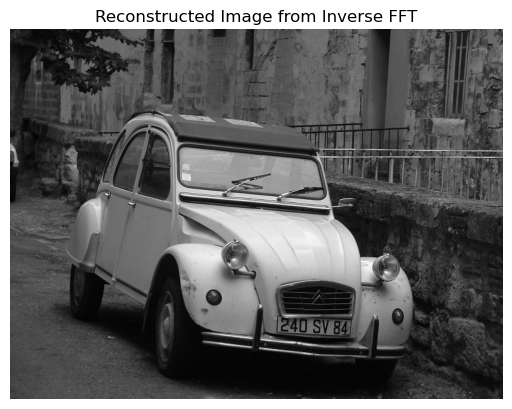

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# OUR CODE HERE
from imageio import imread

# Load the grayscale image
img = imread('images/dolly.png')

# Compute the 2D Fourier transform
F = np.fft.fft2(img)

# Inverse transform to reconstruct the image
img_recon = np.fft.ifft2(F)
img_recon = np.real(img_recon)  # Convert from complex to real

# Display the reconstructed image
plt.figure()
plt.imshow(img_recon, cmap='gray')
plt.title('Reconstructed Image from Inverse FFT')
plt.axis('off')
plt.show()


If we simply perform ifft2, we get back the original image. Without centering issues, the reconstruction should closely match the original. Differences are due to numerical precision.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

Keep amplitude, vary phase. Example:

Fixed phase (e.g. all zeros)
Random phase
Original phase

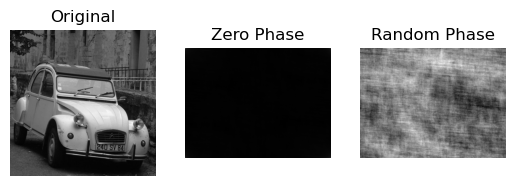

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')

# OUR CODE HERE

# Original amplitude, zero phase
F_zero_phase = amplitude * np.exp(1j*0)
img_zero_phase = np.fft.ifft2(F_zero_phase)
img_zero_phase = np.real(img_zero_phase)

# Original amplitude, random phase
random_phase = 2*np.pi*np.random.rand(*phase.shape)
F_random_phase = amplitude * np.exp(1j*random_phase)
img_random_phase = np.fft.ifft2(F_random_phase)
img_random_phase = np.real(img_random_phase)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_zero_phase, cmap='gray')
plt.title('Zero Phase')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_random_phase, cmap='gray')
plt.title('Random Phase')
plt.axis('off')
plt.show()



With zero or random phase, the structure is lost; you mostly see a blurred spot for zero phase and noise-like patterns for random phase. The original phase is crucial for maintaining recognizable image features.

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


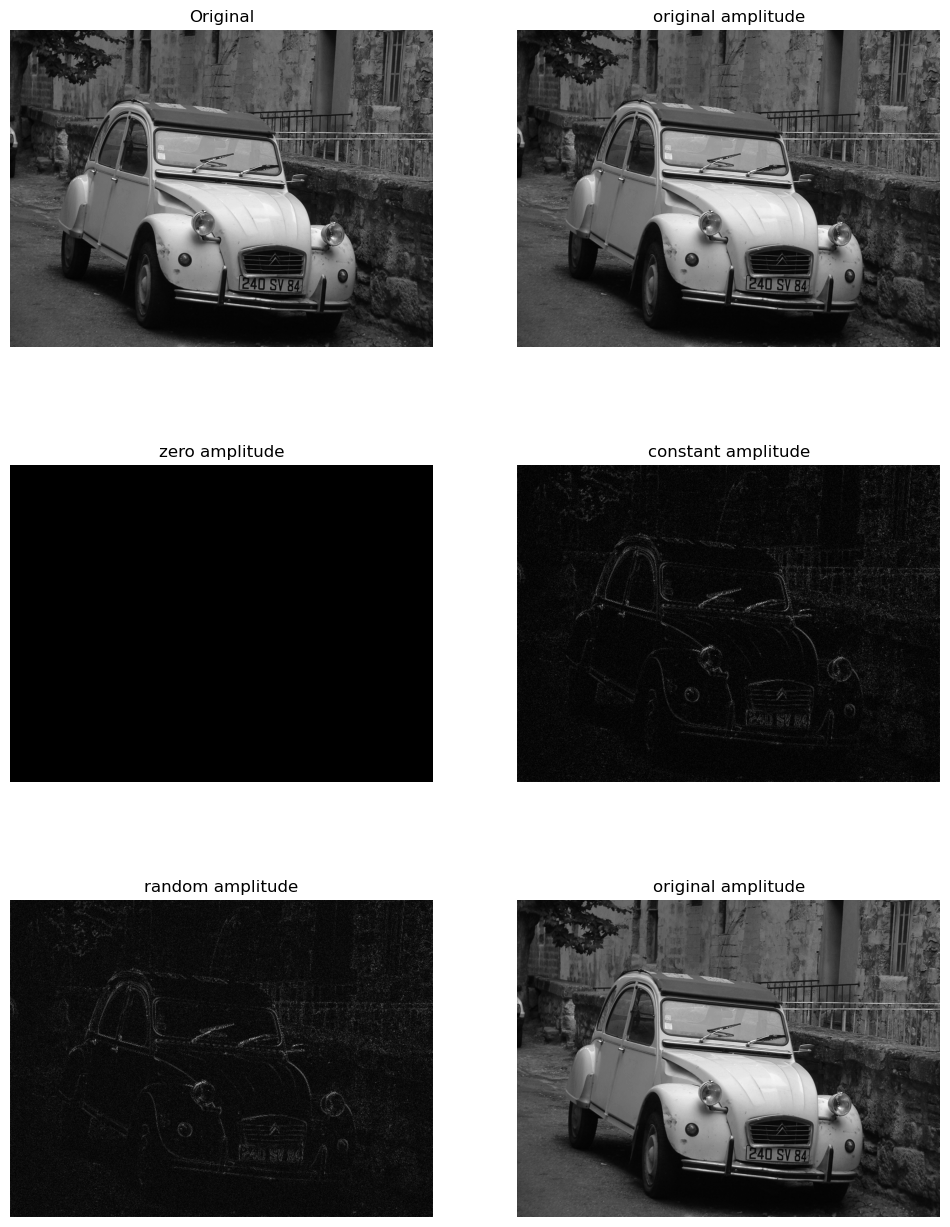

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()


**EXPLAIN THE RESULTS:**

If we keep the original phase but mess around with the amplitude, this happens:

- **Zero amplitude:** Everything just goes black. Without any amplitude, no intensity information survives.
- **Constant amplitude:** We can see some faint outlines of the original scene. The phase still keeps track of where edges and shapes should be, but since the amplitude is uniform, we lose all proper contrast.
- **Random amplitude:** It looks super noisy and distorted. The structure is kind of still there because of the phase, but the brightness distribution makes no sense.
- **Original amplitude:** When we return to the original amplitude, the image looks normal again. You get back all the proper variations in intensity, combined with the correct structural layout from the phase.

Basically, the phase defines the geometry or the layout of the image, while the amplitude affects how bright or dark different parts are. If you mess up the amplitude, you still see some vague structure, but the image just doesn't look right.

## Assignment 2: Implementing Fourier Transform (6 points)

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

Fourier transform describes an image in terms of frequencies by looking at the patterns in pixels. The frequency space is the result of the fourier transform which shows the frequency of a certain pattern. Low frequencies respresent smooth details, whereas high frequencies show edges or fine details. A point in that space represents how strong the current pattern is in the image. The amplitude shows how much it changes the image and the alignment(phase) how that pattern is positioned in the image.

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

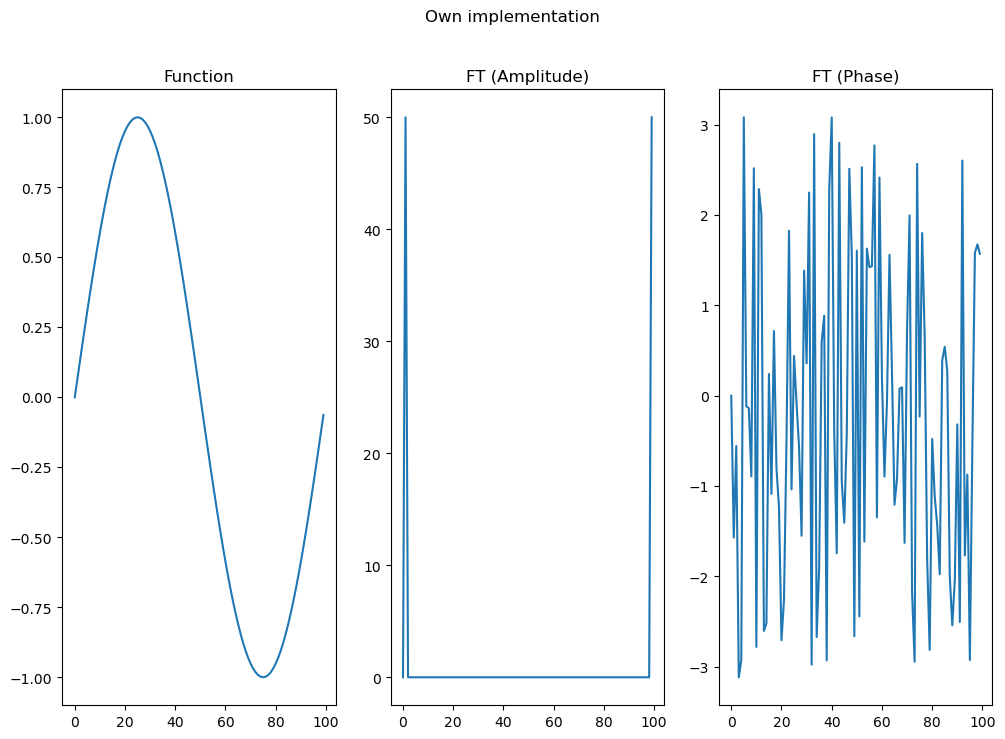

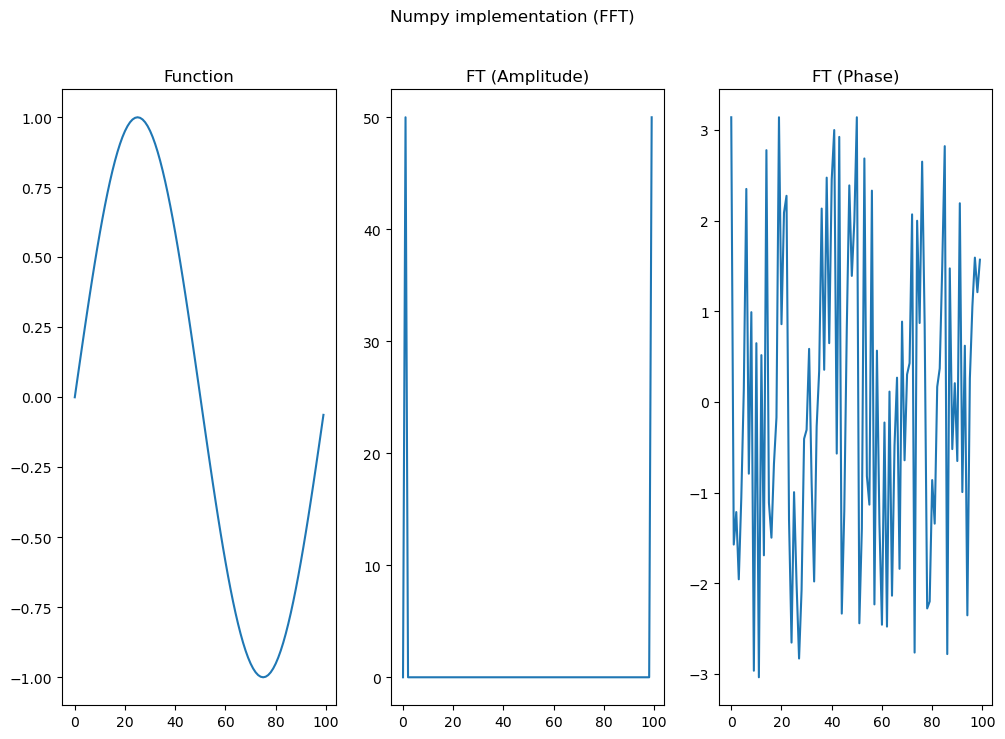

In [15]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """

    # An array of complex numbers to store the Fourier coefficients
    ft = np.zeros(func.shape, dtype=complex)

    L = len(func)
    # Frequency indices
    n = np.arange(L)
    # Position indices as a column vector
    x = np.arange(L).reshape(-1, 1) 

    # Create the exponential term matrix
    exp_term = np.exp(-2j * np.pi * n * x / L)

    # Compute the Fourier coefficients by summing contributions for each frequency
    ft = np.dot(func, exp_term)

    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`. 
Hint: If you experience long runtimes use a smaller part of the image for development. 

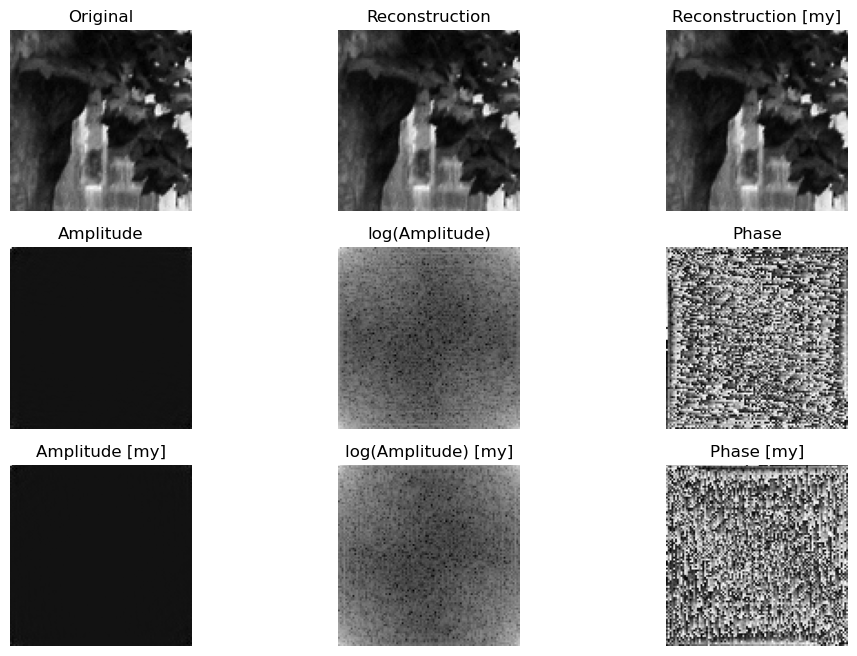

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def fourier2d(frame):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
    
    """
    x,y = np.meshgrid(np.arange(frame.shape[0]), np.arange(frame.shape[1]))
    
    u = np.arange(frame.shape[0])
    v = np.arange(frame.shape[1])

    fourier_space = np.zeros_like(frame, complex)

    # for u in range(frame.shape[0]):
    #     for v in range(frame.shape[1]):
    #         frequencies = x*u/frame.shape[0] + y*v/frame.shape[1]
    #         exponent = -2 * 1j * np.pi * frequencies 
    #         waves = np.exp(exponent)
    #         res = (frame * waves.T).sum()
    #         fourier_space[u,v] = res


    # Instead of the double for loop variant
    # Here is a full vectorized version:
    # All possible combinations for waves images w_uv(x,y)
    frequencies = (x[:,:, None]*u/frame.shape[0])[:,:,:, None] + (y[:,:, None]*v/frame.shape[1])[:,:,None]
    
    # Full exponent term
    exponent = -2 * 1j * np.pi * frequencies 
    
    waves = np.exp(exponent)
    res = frame * waves

    # Because of the vectorization, we have 4 dims and by taking the sum
    fourier_space = res.sum(axis=(-2,-1))
    return fourier_space


def inverse_fourier2d(frame):
    x,y = np.meshgrid(np.arange(frame.shape[0]), np.arange(frame.shape[1]))
    u,v = np.arange(frame.shape[0]), np.arange(frame.shape[1])

    # Full vectorized version of the w_uv(x,y) again.
    frequencies = (x[:,:, None]*u/frame.shape[0])[:,:,:, None] + (y[:,:, None]*v/frame.shape[1])[:,:,None]
    
    # The exponent term has no minus.
    exponent = 2 * 1j * np.pi * frequencies

    waves = np.exp(exponent)

    # Double for loop version
    res = np.zeros_like(frame, complex)
    for i in range(frame.shape[0]):
        for j in range(frame.shape[1]):
            res += frame[i,j] * waves[i,j]

    res /= frame.shape[0]*frame.shape[1]
    return res



# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')[:100, :100]

amplitude = np.fft.fft2(img)
phase = np.angle(amplitude)
restore = inverse_fourier2d(amplitude).real.T
my_amplitude = fourier2d(img)
my_phase = np.angle(my_amplitude)
my_restore = inverse_fourier2d(my_amplitude).real

# YOUR CODE HERE

plt.figure(figsize=(12, 8))

plt.gray()
plt.subplot(3, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(3, 3, 2); plt.axis('off'); plt.imshow(restore); plt.title('Reconstruction')
plt.subplot(3, 3, 3); plt.axis('off'); plt.imshow(my_restore); plt.title('Reconstruction [my]')

plt.subplot(3, 3, 4); plt.axis('off'); plt.imshow(amplitude.real); plt.title('Amplitude')
plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude).real); plt.title('log(Amplitude)')
plt.subplot(3, 3, 6); plt.axis('off'); plt.imshow(phase); plt.title('Phase')

plt.subplot(3, 3, 7); plt.axis('off'); plt.imshow(my_amplitude.real); plt.title('Amplitude [my]')
plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude).real); plt.title('log(Amplitude) [my]')
plt.subplot(3, 3, 9); plt.axis('off'); plt.imshow(my_phase); plt.title('Phase [my]')

plt.show()

## Assignment 3: Convolution theorem (7 points)

**a)** What does the convolution theorem state and what are its practical consequences?

It explaints the effect of convolution on frequencies. A convolution in pixel space is a (complex) multiplication in Fourier.
It allows fast computation of convolution and its properties can be derived from its fourier transform

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

Like in the chapter local operators: introduce periodic boundary conditions and assume that the signal is periodic and doesnt end at the border.

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


* FFT for image and kernel : O (N log(N))
* pointwise multiplication : O(N)
* Transform back : O (N log(N))

-> in total O (N log(N)) + O(N) + O (N log(N)) = O (N log(N))

**d)** Prove the convolution theorem.

*Hint 1:* Look at the continuous 1d proof on [wikipedia](https://en.wikipedia.org/wiki/Convolution_theorem)

*Hint 2:* Transition to discrete 2d described on CV-06 slides 12-13 

\begin{align*}
\mathcal{F}[f\ast h](u,v)
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[f\ast h](x,y)\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} 
\\
&=\ldots\\
&= \mathcal{F}[f](u,v)\cdot \mathcal{F}[h](u,v)
\end{align*}

YOUR ANSWER HERE

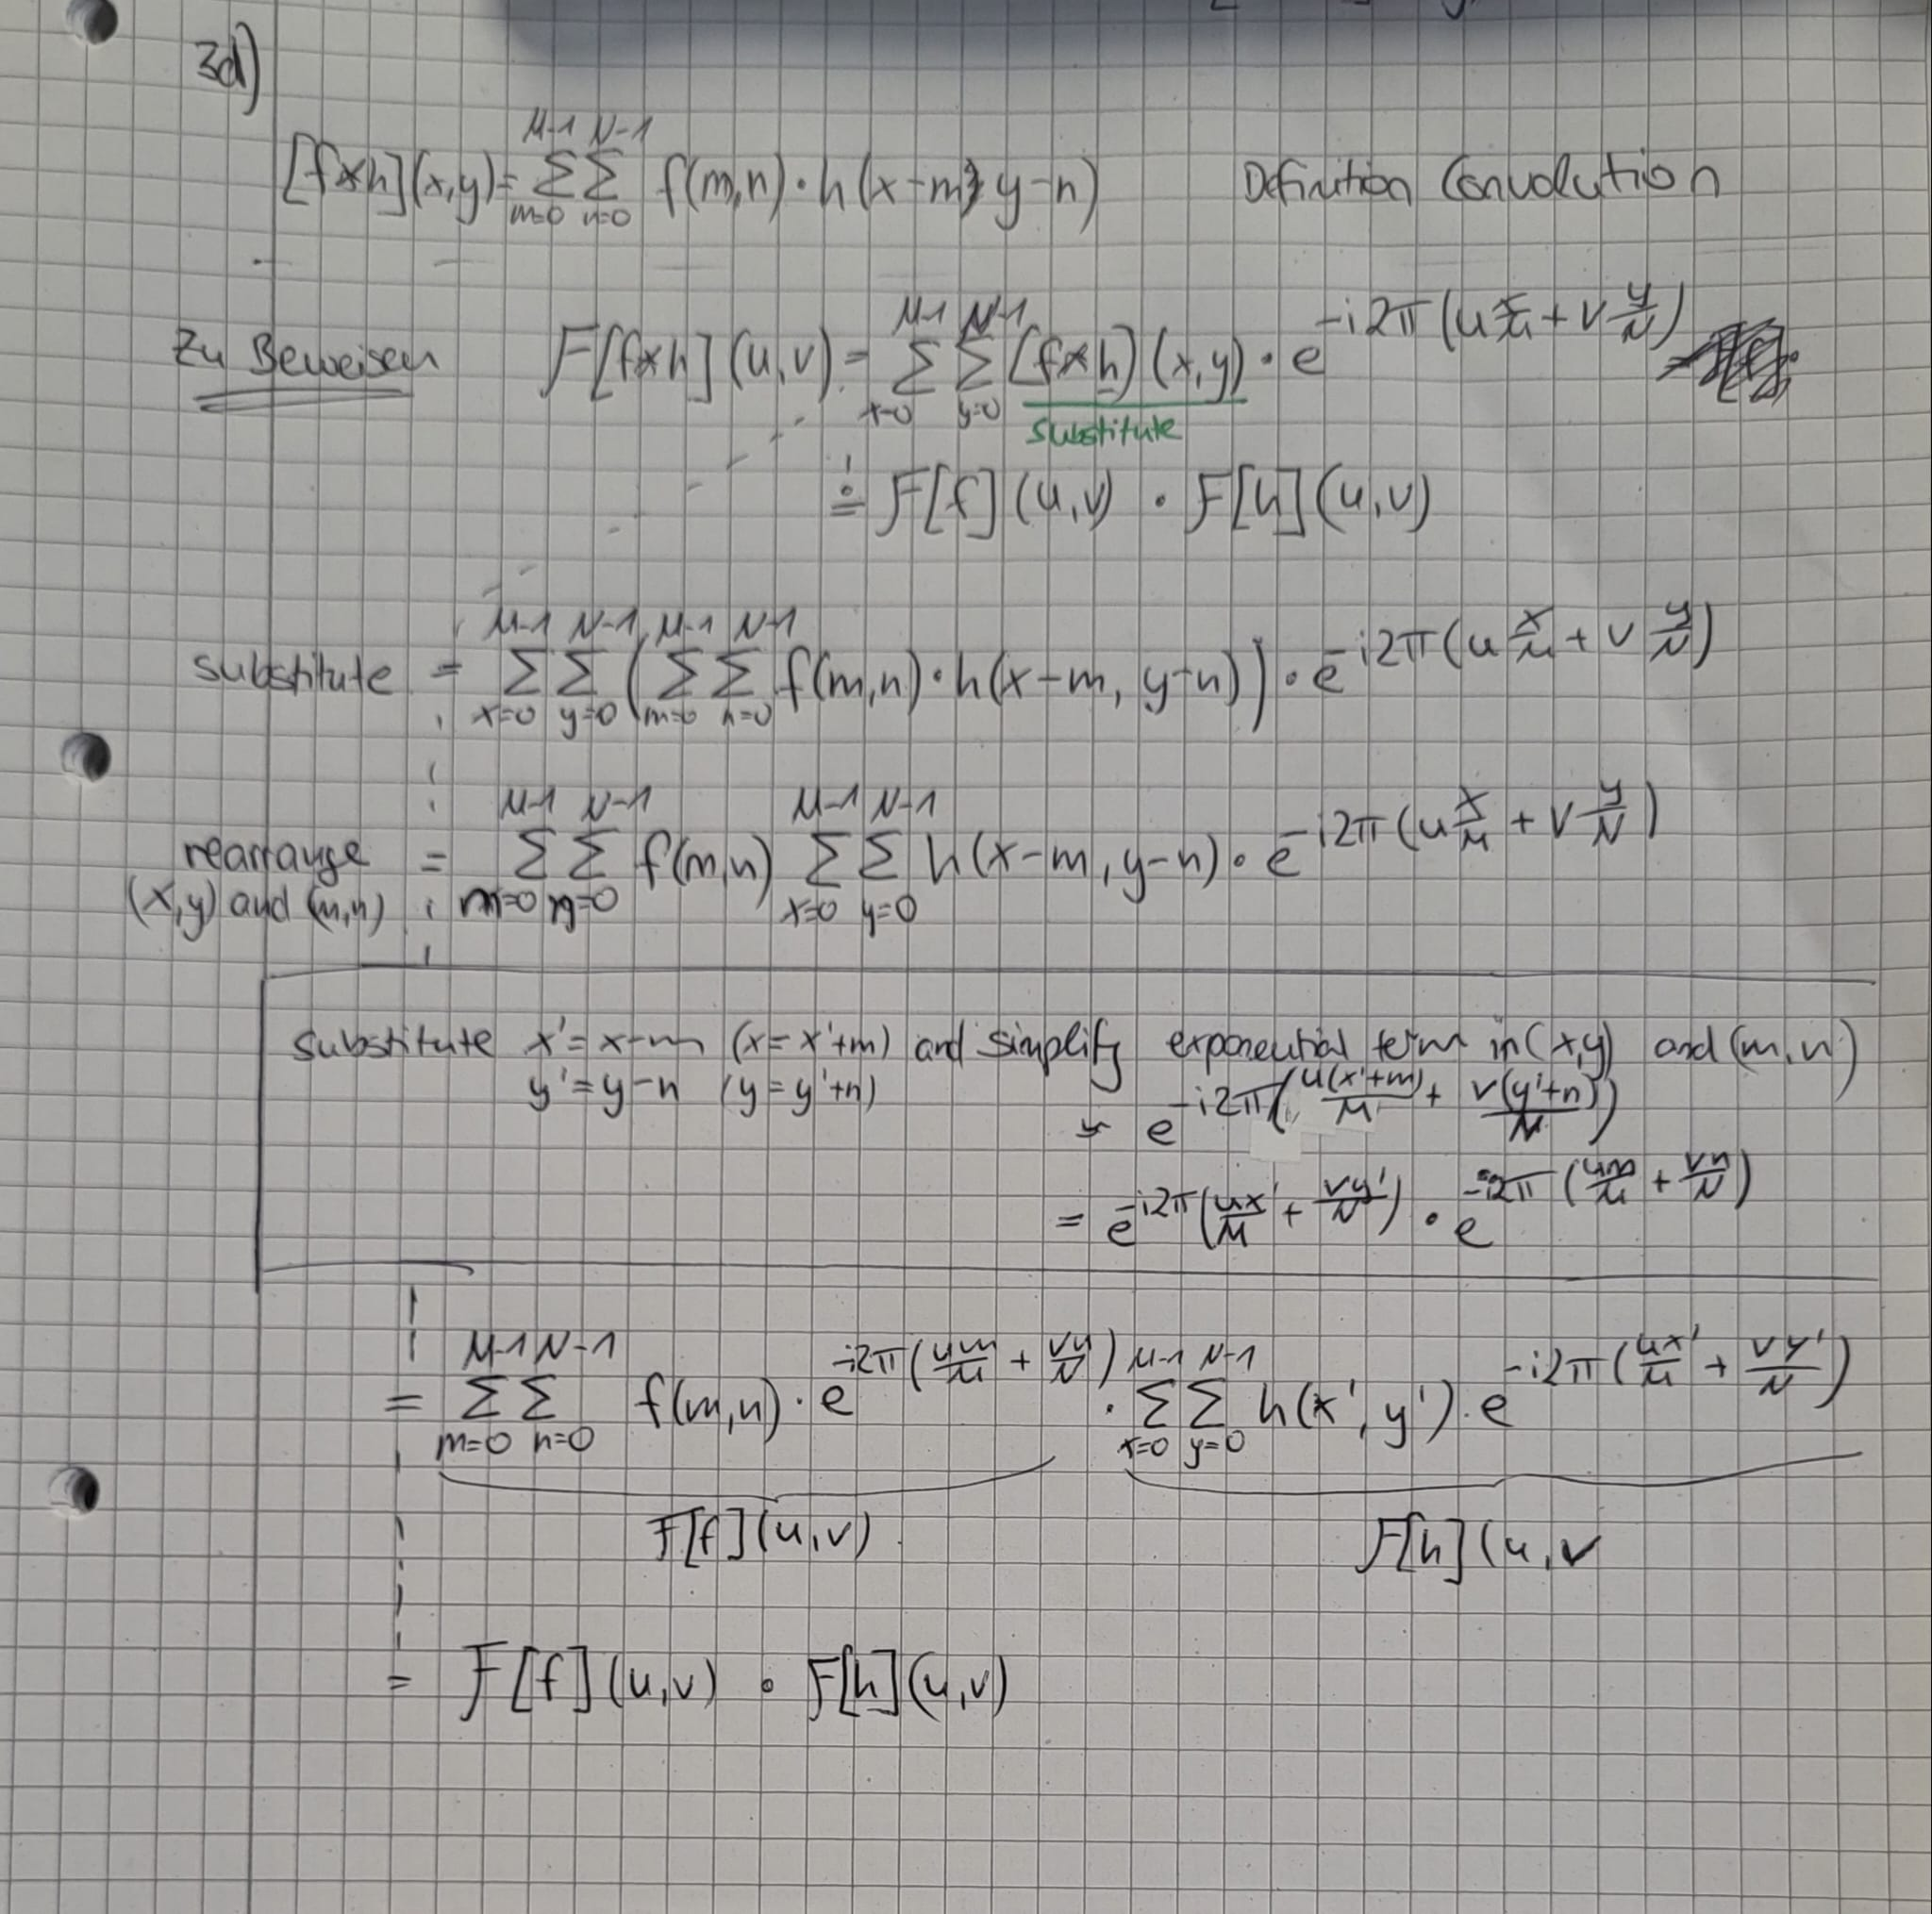

In [16]:
from IPython.display import Image, display
display(Image('images/convolutionTheoremProof.jpg'))